## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: 'https://huggingface.co/datasets/dair-ai/emotion'

---

## Task 1: Introduction

 I have modified but this project is inspired from Coursea guided project by Amit Yadav.

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [3]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 23.3 MB/s eta 0:00:00


In [4]:
%matplotlib inline

import nlp
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset from huggingface transformers.
2. Preprocessing the text
3. Creating train, validation and test sets
4. Extracting tweets and labels from the examples

In [5]:
#reading the dataset from hugging face datahub.

df = pd.read_parquet("hf://datasets/dair-ai/emotion/unsplit/train-00000-of-00001.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
df

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
416804,that was what i felt when i was finally accept...,1
416805,i take every day as it comes i m just focussin...,4
416806,i just suddenly feel that everything was fake,0
416807,im feeling more eager than ever to claw back w...,1


In [7]:
df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [8]:
newdf = df.sample(n=20000, replace=False, random_state=123)

In [9]:
newdf

,text,label
98301,i am feeling melancholy and have finally pinpo...,0
41147,i miss having someone to talk to who i have th...,1
151024,i just feel like i get blamed for everything,0
202104,i also apologize for mentioning about him in m...,3
73602,im finding is the difference in having a life ...,1
...,...,...
358356,i feel so fine i i i feel so fine it blows blo...,1
280516,i am not going to lie the feeling i have about...,0
121062,i feel that i am funny charming and that i rea...,5
281576,i feel like i have all these cute things but i...,1


In [10]:
newdf['label'].value_counts()

,count
label,
1,6869
0,5723
3,2747
4,2304
2,1679
5,678


In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import re


def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = [word for word in text.split() if word not in stopwords]
    filtered_text = ' '.join(text_tokens)
    return filtered_text

clean_text = []
for text in newdf['text']:
    clean_text.append(text_preprocessing(text))

newdf['cleaned_text'] = clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
newdf

,text,label,cleaned_text
98301,i am feeling melancholy and have finally pinpo...,0,feeling melancholy finally pinpointed cause
41147,i miss having someone to talk to who i have th...,1,miss someone talk feeling pleasant lovely
151024,i just feel like i get blamed for everything,0,feel like get blamed everything
202104,i also apologize for mentioning about him in m...,3,also apologize mentioning previous post know w...
73602,im finding is the difference in having a life ...,1,im finding difference life leaves wanting one ...
...,...,...,...
358356,i feel so fine i i i feel so fine it blows blo...,1,feel fine feel fine blows blows mind blows min...
280516,i am not going to lie the feeling i have about...,0,going lie feeling body muscles hurt visibly se...
121062,i feel that i am funny charming and that i rea...,5,feel funny charming really connect audience
281576,i feel like i have all these cute things but i...,1,feel like cute things dont feel comfortable do...


In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(newdf, test_size=0.2, random_state=42)

In [14]:
new_train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [15]:
new_train_df

,text,label,cleaned_text
45807,im feeling indecisive as to what to do about t...,4,im feeling indecisive right average lj age kee...
303900,im not really feeling the pressure but im actu...,4,im really feeling pressure im actually kinda n...
162194,i feel like i look awful in them,0,feel like look awful
25532,i feel safe with her and she d the first call ...,1,feel safe first call make real trouble
299004,i never ever thought i would miss that part si...,0,never ever thought would miss part since part ...
...,...,...,...
295253,i am very happy for all my friends that are ex...,3,happy friends expecting even though feel jealo...
300398,ive been feeling agitated and pissy a lot late...,4,ive feeling agitated pissy lot lately im tryin...
243644,im leaving work soon and going out to dinner a...,1,im leaving work soon going dinner feel optimis...
69526,i realized how ridiculous this whole thing is ...,1,realized ridiculous whole thing feeling optimi...


In [52]:
def extract_tweets(data):
    tweets = list(data['cleaned_text'])
    labels = list(data['label'])
    return tweets, labels

train_tweets, train_labels = extract_tweets(new_train_df)
val_tweets, val_labels = extract_tweets(val_df)
test_tweets, test_labels = extract_tweets(test_df)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_tweets)

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_tweets)

In [54]:
train_tweets[0]

'im feeling indecisive right average lj age keep birthday information publically available'

In [55]:
train_sequences[0]

[4, 2, 1110, 38, 2839, 2484, 769, 105, 947, 948, 6320, 1410]

In [56]:
# Now reverse the first one
decoded = tokenizer.sequences_to_texts([train_sequences[0]])
print(decoded)

['im feeling indecisive right average lj age keep birthday information publically available']


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

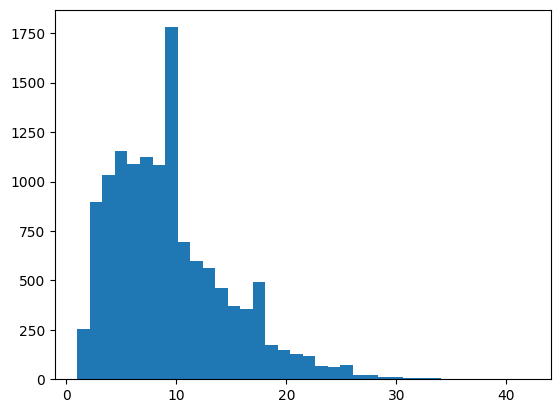

In [57]:
tweet_lengths = [len(tweet.split(' ')) for tweet in train_tweets]
plt.hist(tweet_lengths, bins=len(set(tweet_lengths)))
plt.show()

# ***As the length of tweets are not same in length. Padding should perform as most of models like expect same shape of input***

In [58]:
max_length = 100
padding_type = 'post'
trunc_type = 'post'

from tensorflow.keras.preprocessing.sequence import pad_sequences

def Pad_sequences(tokenizer, tweets, max_length, padding_type, trunc_type):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    return padded_sequences

train_padded_sequences = Pad_sequences(tokenizer, train_tweets, max_length, padding_type, trunc_type)
val_padded_sequences = Pad_sequences(tokenizer, val_tweets, max_length, padding_type, trunc_type)
test_padded_sequences = Pad_sequences(tokenizer, test_tweets, max_length, padding_type, trunc_type)

In [59]:
train_padded_sequences[0]

array([   4,    2, 1110,   38, 2839, 2484,  769,  105,  947,  948, 6320,
       1410,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [60]:
classes = set(train_labels)
classes

{0, 1, 2, 3, 4, 5}

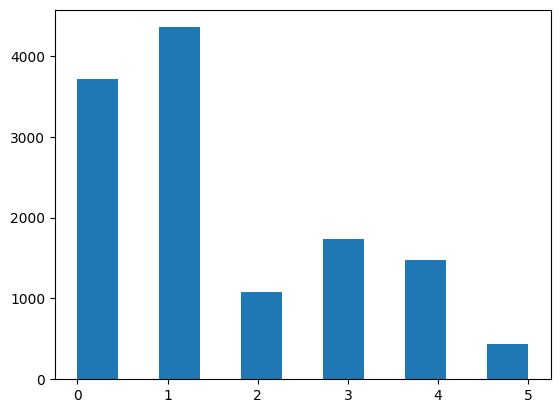

In [61]:
plt.hist(train_labels, bins=11)
plt.show()

Data set is imbalanced and more tweets are in 0 and 1 label.
So, to balance them we will use

In [91]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

def samper(data,labels):
  ros = RandomOverSampler(random_state=42)
  padded_sequences, labels = ros.fit_resample(data,labels)
  return padded_sequences, labels

randomover_train_padded_sequences, randomover_train_labels = samper(train_padded_sequences,train_labels)

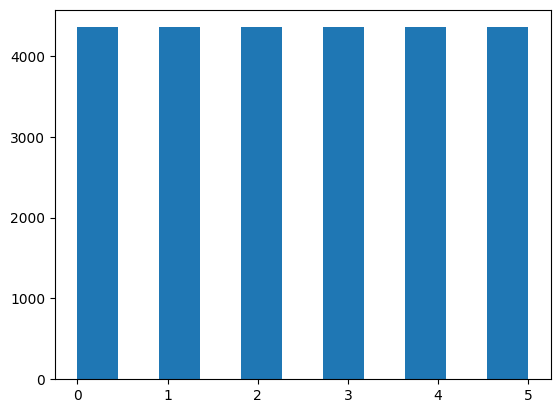

In [92]:
plt.hist(randomover_train_labels, bins=11)
plt.show()

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16,input_shape=(max_length,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 40)        │         5,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 40)             │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,926 (687.21 KB)

 Trainable params: 175,926 (687.21 KB)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Training the model with Randomover sampler technique

In [93]:
randomover_train_labels = np.array(randomover_train_labels, dtype=np.int32)
randomtover_train_padded_sequences = np.array(randomover_train_padded_sequences, dtype=np.int32)

val_padded_sequences = np.array(val_padded_sequences, dtype=np.int32)
val_labels = np.array(val_labels, dtype=np.int32)

In [94]:
train_model = model.fit(
    randomtover_train_padded_sequences, randomover_train_labels,
    validation_data=(val_padded_sequences, val_labels),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.8503 - val_loss: 0.7775
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.8494 - val_loss: 0.8135
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.8406 - val_loss: 0.8575


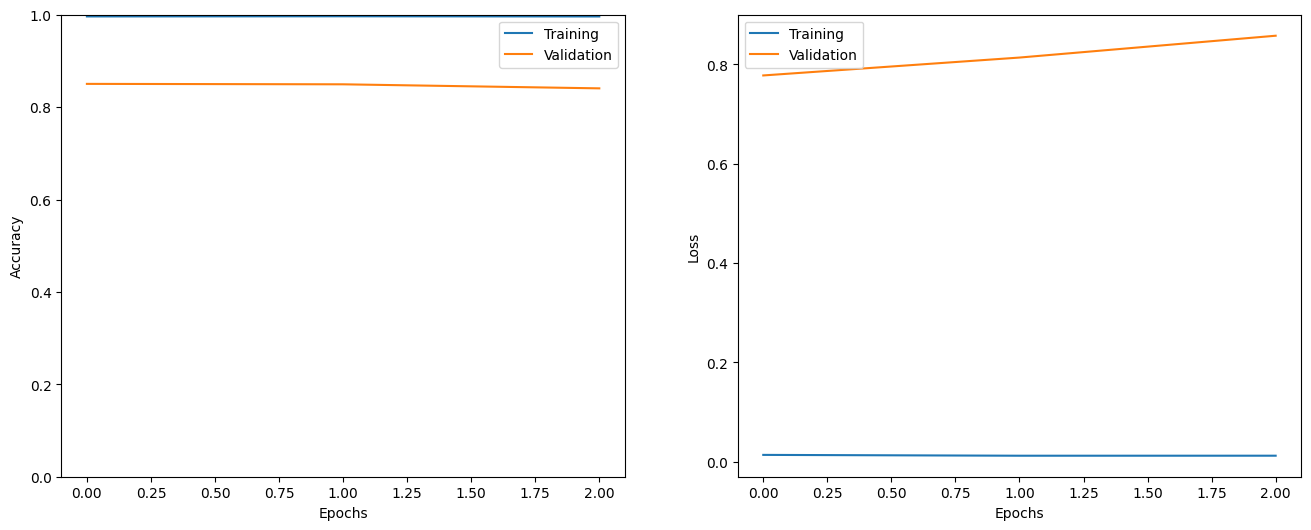

In [95]:
show_history(train_model)

# **The model is Overfitted**

In [96]:
import imblearn

from collections import Counter
from imblearn.under_sampling import AllKNN


def knn_sampler(data,labels):
  allknn = AllKNN()
  padded_sequences, labels = allknn.fit_resample(data,labels)
  print(sorted(Counter(labels).items()))
  return padded_sequences, labels

knn_train_padded_sequences, knn_train_labels = knn_sampler(train_padded_sequences,train_labels)

[(np.int32(0), 4354), (np.int32(1), 1531), (np.int32(2), 4282), (np.int32(3), 4028), (np.int32(4), 4154), (np.int32(5), 4345)]


In [83]:
knn_train_labels = np.array(knn_train_labels, dtype=np.int32)
knn_train_padded_sequences = np.array(knn_train_padded_sequences, dtype=np.int32)

In [84]:
train_model_knn= model.fit(
    knn_train_padded_sequences, knn_train_labels,
    validation_data=(val_padded_sequences, val_labels),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

Epoch 1/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9968 - loss: 0.0124 - val_accuracy: 0.8378 - val_loss: 0.7905
Epoch 2/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9946 - loss: 0.0192 - val_accuracy: 0.8441 - val_loss: 0.7954
Epoch 3/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.8413 - val_loss: 0.8405
Epoch 4/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9973 - loss: 0.0123 - val_accuracy: 0.8469 - val_loss: 0.8603
Epoch 5/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.8359 - val_loss: 0.8805
Epoch 6/20
710/710 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.8438 - val_loss: 0.8671


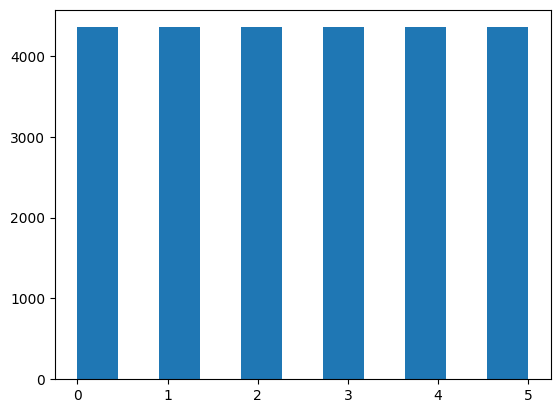

In [90]:
train_padded_sequences = np.array(train_padded_sequences, dtype=np.int32)
train_labels = np.array(train_labels, dtype=np.int32)

plt.hist(train_labels, bins=11)
plt.show()

In [ ]:

train_model_ = model.fit(
    train_padded_sequences, train_labels,
    validation_data=(val_padded_sequences, val_labels),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

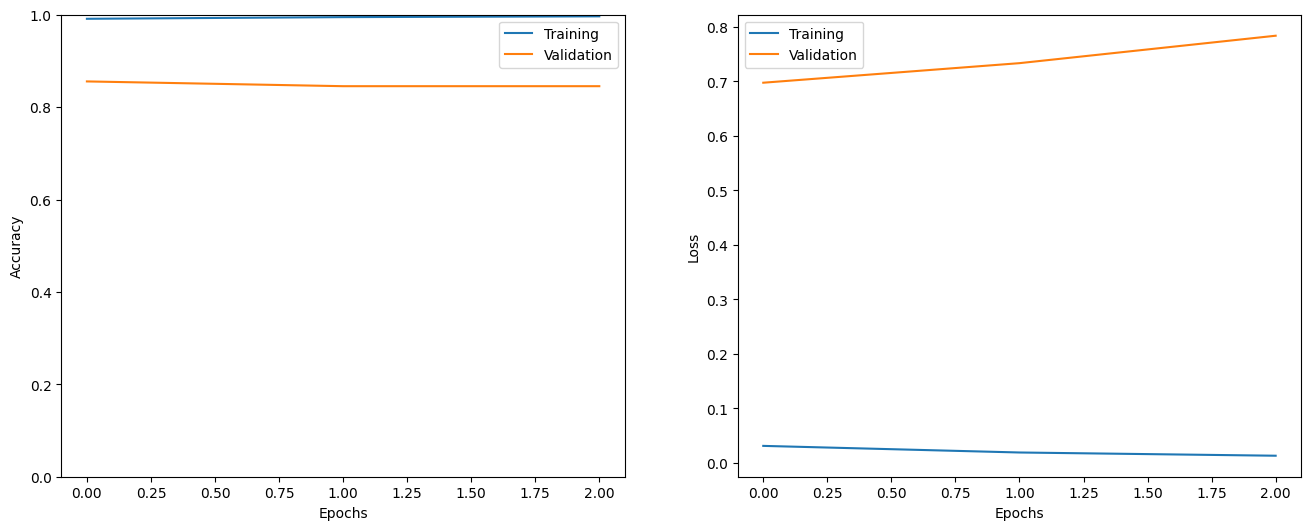

In [87]:
show_history(train_model)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [89]:
test_labels = np.array(test_labels, dtype=np.int32)
test_padded_sequences = np.array(test_padded_sequences, dtype=np.int32)

_ = model.evaluate(test_padded_sequences, test_labels)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8468 - loss: 0.8102
